In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('mobile_dataset.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#### Univariate Selection

In [5]:
X = df.iloc[:,:-1]
Y = df['price_range']

In [6]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
### Apply SelectKBest Algorithm
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_features = ordered_rank_features.fit(X,Y) 

In [11]:
dfscores = pd.DataFrame(ordered_features.scores_, columns=['Scores'])

In [12]:
dfcolumns = pd.DataFrame(X.columns)

In [15]:
features_rank=pd.concat([dfcolumns, dfscores], axis=1)

In [16]:
features_rank.columns = ['Features', 'Scores']

In [17]:
features_rank

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [18]:
### Higher the scores, higher the importance of features

In [19]:
features_rank.nlargest(10,'Scores')

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [20]:
### Feature Importance
## This techniques gives you a score for each feature of your data, the higher the score more relevant it is

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [22]:
print(model.feature_importances_)

[0.06100157 0.01999184 0.03352676 0.01974993 0.03283773 0.01754207
 0.03508583 0.03453665 0.03601675 0.03285015 0.03444203 0.04743251
 0.04758199 0.39141595 0.03370917 0.03499779 0.03427169 0.01463615
 0.01799471 0.02037873]


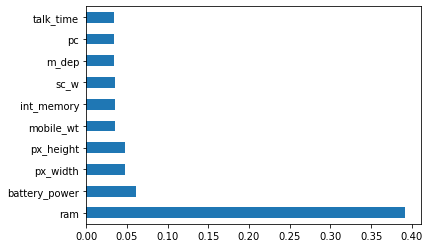

In [26]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [24]:
ranked_features

battery_power    0.061002
blue             0.019992
clock_speed      0.033527
dual_sim         0.019750
fc               0.032838
four_g           0.017542
int_memory       0.035086
m_dep            0.034537
mobile_wt        0.036017
n_cores          0.032850
pc               0.034442
px_height        0.047433
px_width         0.047582
ram              0.391416
sc_h             0.033709
sc_w             0.034998
talk_time        0.034272
three_g          0.014636
touch_screen     0.017995
wifi             0.020379
dtype: float64

In [27]:
### Correlation and AutoCorrelation
import seaborn as sns

In [31]:
corr = df.corr()

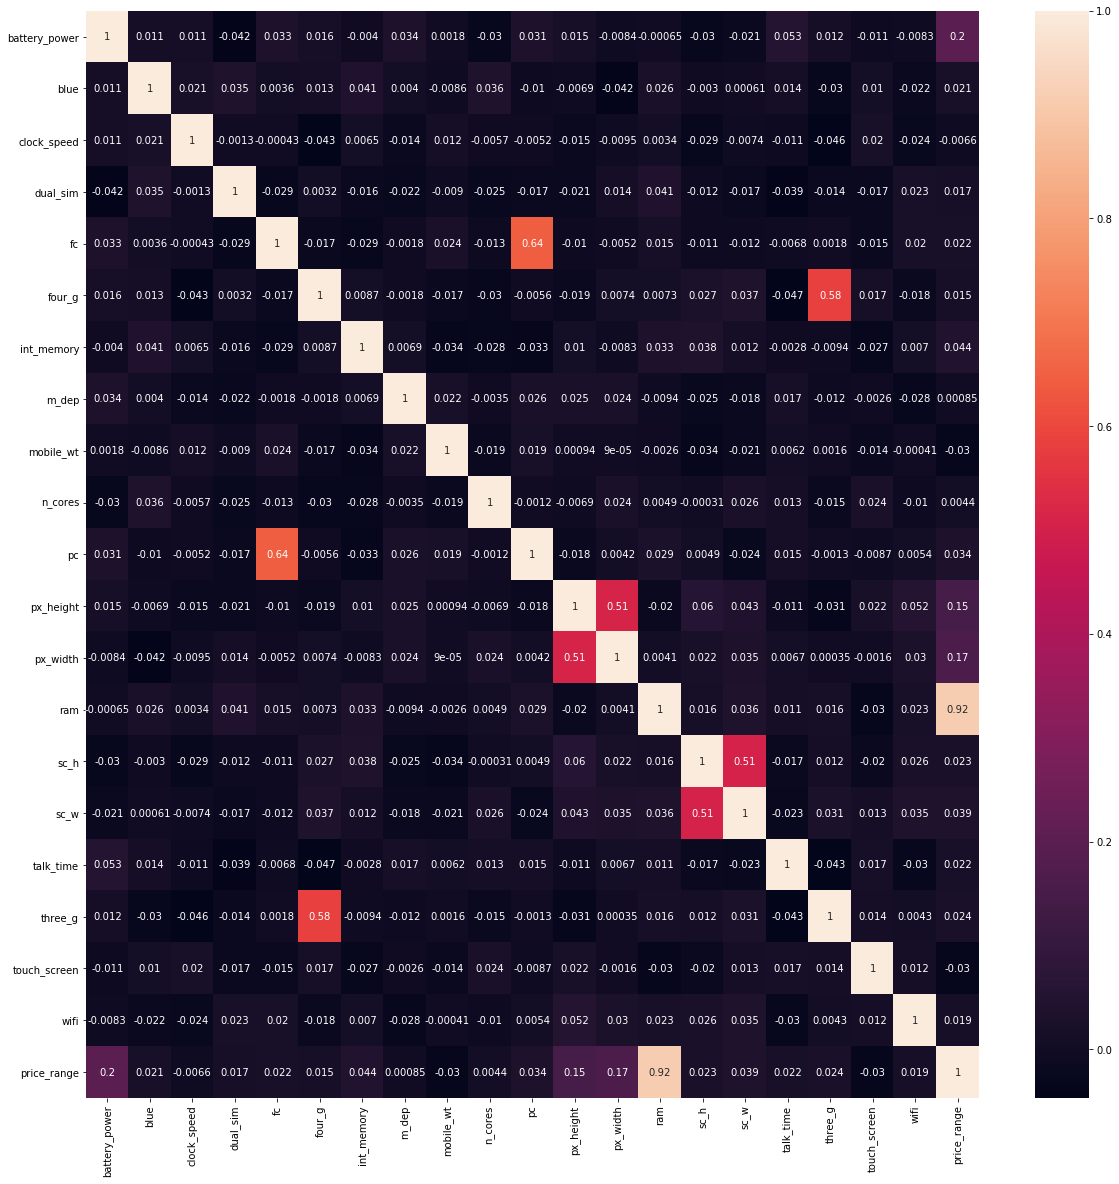

In [34]:
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(), annot=True)

In [49]:
## Remove the correlated
threshold=0.5
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [53]:
### Information Gain

In [51]:
from sklearn.feature_selection import mutual_info_classif

In [54]:
mutual_info = mutual_info_classif(X,Y)

In [55]:
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.849314
battery_power    0.036056
px_height        0.033260
m_dep            0.031675
px_width         0.031339
mobile_wt        0.029311
four_g           0.021829
dual_sim         0.021225
sc_w             0.007683
int_memory       0.000000
blue             0.000000
clock_speed      0.000000
fc               0.000000
wifi             0.000000
touch_screen     0.000000
pc               0.000000
sc_h             0.000000
talk_time        0.000000
three_g          0.000000
n_cores          0.000000
dtype: float64